# 1. Simulation of the Brownian motion as a Gaussian process

### Brownion motion $(B_t, \ t\in[0,1])$

In [12]:
from math import *
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as alg

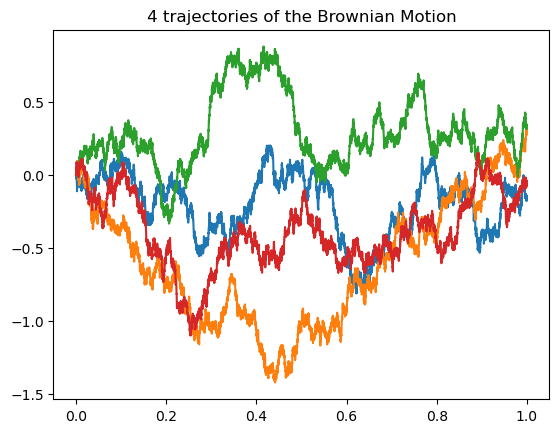

In [15]:
# number of steps of the time grid
N=10000
delta=1/N
t=np.linspace(0,1,N+1)
for i in range(4):
    X=npr.normal(0,1,size=N)
    Brownian=np.array([0])
    Brownian=np.append(Brownian,np.cumsum(np.sqrt(delta)*X))
    plt.plot(t,Brownian)
plt.title('4 trajectories of the Brownian Motion')
plt.show()

In [16]:
# construction of the covariance matrix
def CovMatrix(n):
    K=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i<j:
                K[i,j]=(1+i)/n
            else:
                K[i,j]=(1+j)/n
    return K
print(CovMatrix(10))   

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.1 0.2 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
 [0.1 0.2 0.3 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.1 0.2 0.3 0.4 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.6 0.6 0.6 0.6]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.7 0.7 0.7]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.8 0.8]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 0.9]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]]


In [18]:
# construction of N Gaussian vectors centered with a given covariance matrix
def SqrCovMatrix(n):
    return alg.cholesky(CovMatrix(n))
param_n=10
print(SqrCovMatrix(param_n))
def VGauss(n,Nbr):
    X=SqrCovMatrix(n)@npr.randn(n,Nbr)
    return X

[[0.31622777 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.31622777 0.31622777 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.31622777 0.31622777 0.31622777 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.31622777 0.31622777 0.31622777 0.31622777 0.         0.
  0.         0.         0.         0.        ]
 [0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.
  0.         0.         0.         0.        ]
 [0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
  0.         0.         0.         0.        ]
 [0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
  0.31622777 0.         0.         0.        ]
 [0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
  0.31622777 0.31622777 0.         0.        ]
 [0.31622777 0.31622777 0.31622777 0.31622777 0.31622777 0.31622777
  0.31622777 0.31622777 0.31622777 0.        ]
 [0.3

<function matplotlib.pyplot.show(close=None, block=None)>

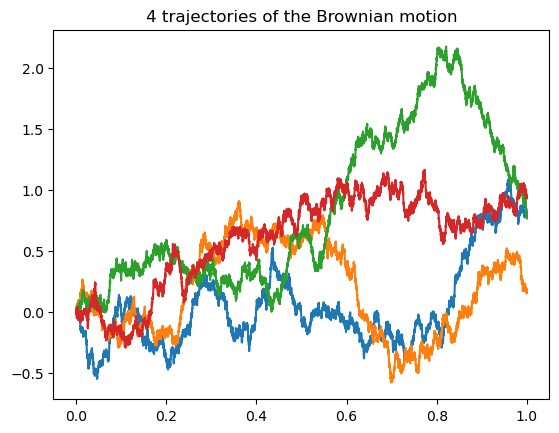

In [19]:
# représentation graphique
n=10000
N_traj=4
X=VGauss(n,N_traj)
B0=np.zeros([1,N_traj])
X=np.concatenate((B0,X),axis=0)
t=np.linspace(0,1,n+1)
plt.plot(t,X[:,0])
plt.plot(t,X[:,1])
plt.plot(t,X[:,2])
plt.plot(t,X[:,3])
plt.title('4 trajectories of the Brownian motion')
plt.show

### Distribution of the time spent by the Brownian motion in $\mathbb{R}_+$

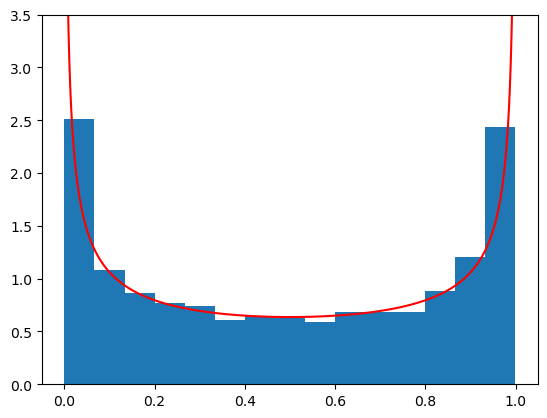

In [23]:
n=1000
N_traj=10000
X=VGauss(n,N_traj)
B0=np.zeros([1,N_traj])
X=np.concatenate((B0,X),axis=0)
positive=np.mean((X>0)*1,0)
plt.hist(positive,density=True,bins=15)
t=np.linspace(0.001,0.999,999)
th_density=1/(np.pi*np.sqrt(t*(1-t)))
plt.plot(t,th_density,'r')
plt.ylim(0,3.5)
plt.show()

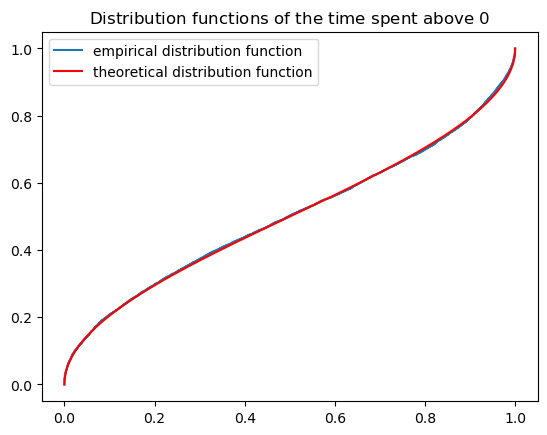

In [24]:
X = np.sort(positive)
F = np.array(range(N_traj))/N_traj
plt.plot(X, F, label='empirical distribution function')
plt.title('Distribution functions of the time spent above $0$')
t=np.linspace(0,1,1001)
Fth=(2/np.pi)*np.arcsin(np.sqrt(t))
plt.plot(t,Fth,'r',label='theoretical distribution function')
plt.legend()
plt.show()

# 2. Brownian motion - Lévy's argument

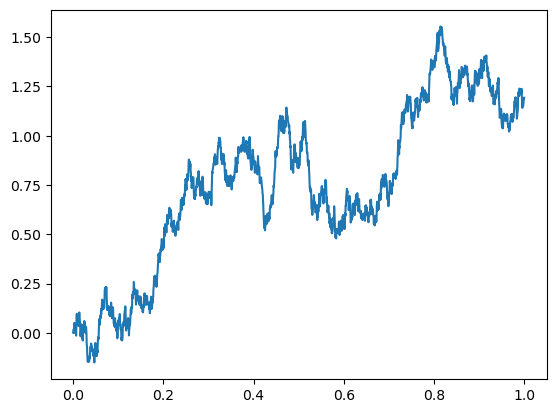

In [29]:
# size of the step: 2 to the power - n
n=11
B=np.zeros((2**n+1))
B[1]=npr.randn(1)
B_interm=np.zeros((2**n+1))
#print(B)
for i in range(n):
    for j in range(2**i+1):
        B_interm[2*j]=B[j]
    for j in range(2**i):
        B_interm[2*j+1]=(B[j]+B[j+1])/2+npr.randn(1)/(2**(i/2+1))
    B=B_interm
    #print(B_interm)
    B_interm=np.zeros((2**n+1))
t=np.linspace(0,1,2**n+1)
plt.plot(t,B)

# 3. Karhunen-Loeve construction

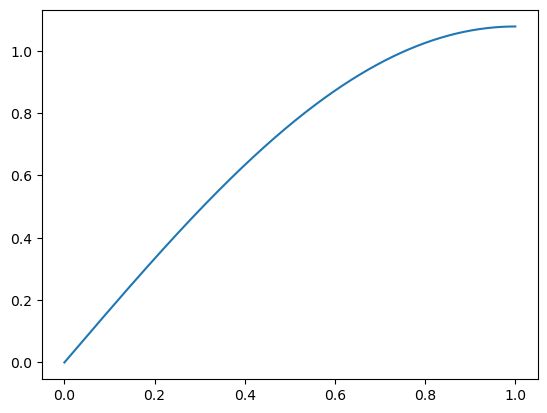

In [10]:
def funct_e(k,t):
    return np.sqrt(2)*np.sin((k-1/2)*np.pi*t)
def lamb(k):
    return 1/((k-1/2)*np.pi)**2
# number of terms in the truncated sum
def traj(N,t,G):
    x=0
    for i in range(N):
        x=x+G[i]*funct_e(i+1,t)*np.sqrt(lamb(i+1))
    return x            
# number of terms in the truncated sum
N=1
nb_step=1000
G=npr.randn(N)
t=np.linspace(0,1,nb_step)
plt.plot(t,traj(N,t,G))
plt.show()